In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
churn_df=churn_data.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

1. RowNumber — номер строки таблицы;
2. CustomerId — идентификатор клиента;
3. Surname — фамилия клиента;
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
5. Geography — страна клиента (банк международный);
6. Gender — пол клиента;
7. Age — возраст клиента;
8. Tenure — сколько лет клиент пользуется услугами банка;
9. Balance — баланс на счетах клиента в банке;
10. NumOfProducts — количество услуг банка, которые приобрёл клиент;
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
13. EstimatedSalary — предполагаемая заработная плата клиента;
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент).

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

In [7]:
churn_df.loc[churn_data['Exited'] == 1, 'Loyal'] = 'Not loyal'
churn_df.loc[churn_data['Exited'] == 0, 'Loyal'] = 'Loyal'
churn_df.loc[churn_data['IsActiveMember'] == 1, 'Status'] = 'Active'
churn_df.loc[churn_data['IsActiveMember'] == 0, 'Status'] = 'Inactive'
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyal,Status
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not loyal,Active
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not loyal,Inactive
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Inactive
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active


Таблица с новыми столбцами:
1. RowNumber — номер строки таблицы;
2. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
3. Geography — страна клиента (банк международный);
4. Gender — пол клиента;
5. Age — возраст клиента;
6. Tenure — сколько лет клиент пользуется услугами банка;
7. Balance — баланс на счетах клиента в банке;
8. NumOfProducts — количество услуг банка, которые приобрёл клиент;
9. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
10. EstimatedSalary — предполагаемая заработная плата клиента;
11. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент);
12. Loyal - статус лояльности;
13. Status - статус активного клиента.

Удалим незадействованные столбцы таблицы:

1. CustomerId — идентификатор клиента;
2. Surname — фамилия клиента;
3. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет).

In [8]:
churn_df = churn_df.drop(['CustomerId', 'Surname', 'HasCrCard'], axis=1)
churn_df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Loyal,Status
0,1,619,France,Female,42,2,0.00,1,1,101348.88,1,Not loyal,Active
1,2,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,Loyal,Active
2,3,502,France,Female,42,8,159660.80,3,0,113931.57,1,Not loyal,Inactive
3,4,699,France,Female,39,1,0.00,2,0,93826.63,0,Loyal,Inactive
4,5,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,Loyal,Active


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
__________________________________________________________________________________________________________________________________________

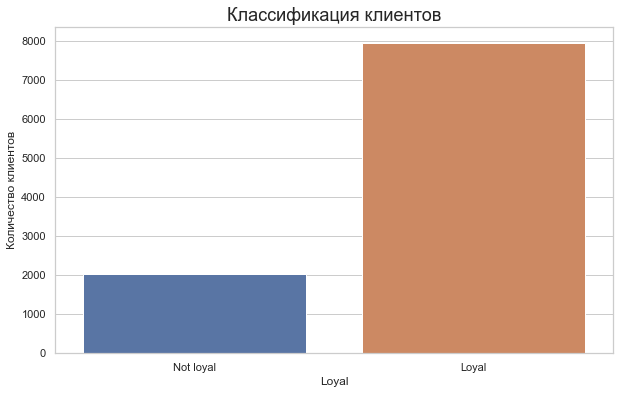

In [44]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
clients_group_1 = sns.countplot(
    data=churn_df, 
    x='Loyal'
)
clients_group_1.set_ylabel('Количество клиентов')
clients_group_1.set_title('Классификация клиентов', fontsize=18)
plt.show()


Отток клиентов не такой большой, так как лояльных клиентов больше в четыре раза.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.
__________________________________________________________________________________________________________________________________________

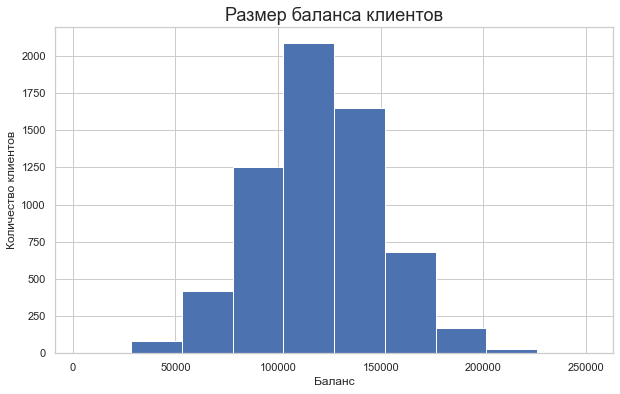

In [45]:
mask = churn_df.Balance > 2500
churn_df_mask = churn_df[mask]
clients_group_2 = churn_df_mask['Balance'].plot(
    kind='hist',
    grid=True,
    figsize=(10, 6),
    style="whitegrid",
    )
clients_group_2.set_xlabel('Баланс')
clients_group_2.set_ylabel('Количество клиентов')
clients_group_2.set_title('Размер баланса клиентов', fontsize=18)
plt.show()

Клиенты, имеющие на балансе от 70 до 150 тысяч представляют собой наибольшую группу. Можно сделать вывод,что программа лояльности должна быть рассчитана на людей среднего достатка преимущественно.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
__________________________________________________________________________________________________________________________________________

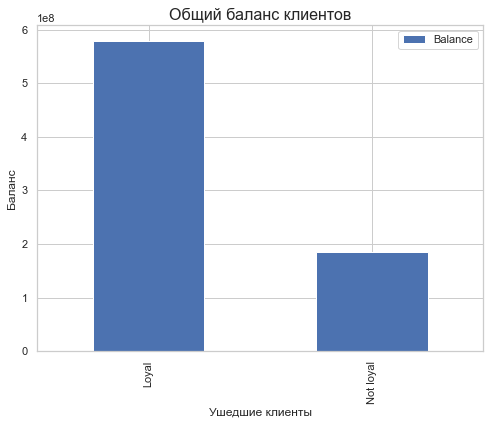

In [46]:
balance = churn_df_mask.groupby(['Loyal'])[['Balance']].sum()
clients_group_3 = balance.plot(
    kind='bar',
    grid=True,
    figsize=(8, 6),
    style="whitegrid"
)
clients_group_3.set_xlabel('Ушедшие клиенты')
clients_group_3.set_ylabel('Баланс')
clients_group_3.set_title('Общий баланс клиентов', fontsize=16)
plt.show()

Сумма баланса нелояльных клиентов в три раза меньше суммы баланса лояльных клиентов.Возможно эти люди больше используют наличные либо имеют основной счет в другом банке на лучших условиях.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?
__________________________________________________________________________________________________________________________________________

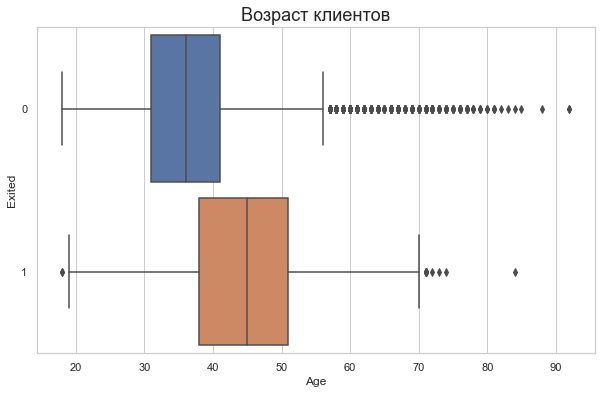

In [47]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
clients_group_4 = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
)
clients_group_4.set_title('Возраст клиентов', fontsize=18)
plt.show()

Большой отток клиентов в диапазоне от 56 лет до 93 лет, соответственно люди старше 55 лет не целевые клиенты банка.Отток в нелояльной группе от 37 до 52 лет, можно сделать вывод, что это именно та возрастная группа, на которую нужно ориентировать программу привлечения клиентов.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
__________________________________________________________________________________________________________________________________________

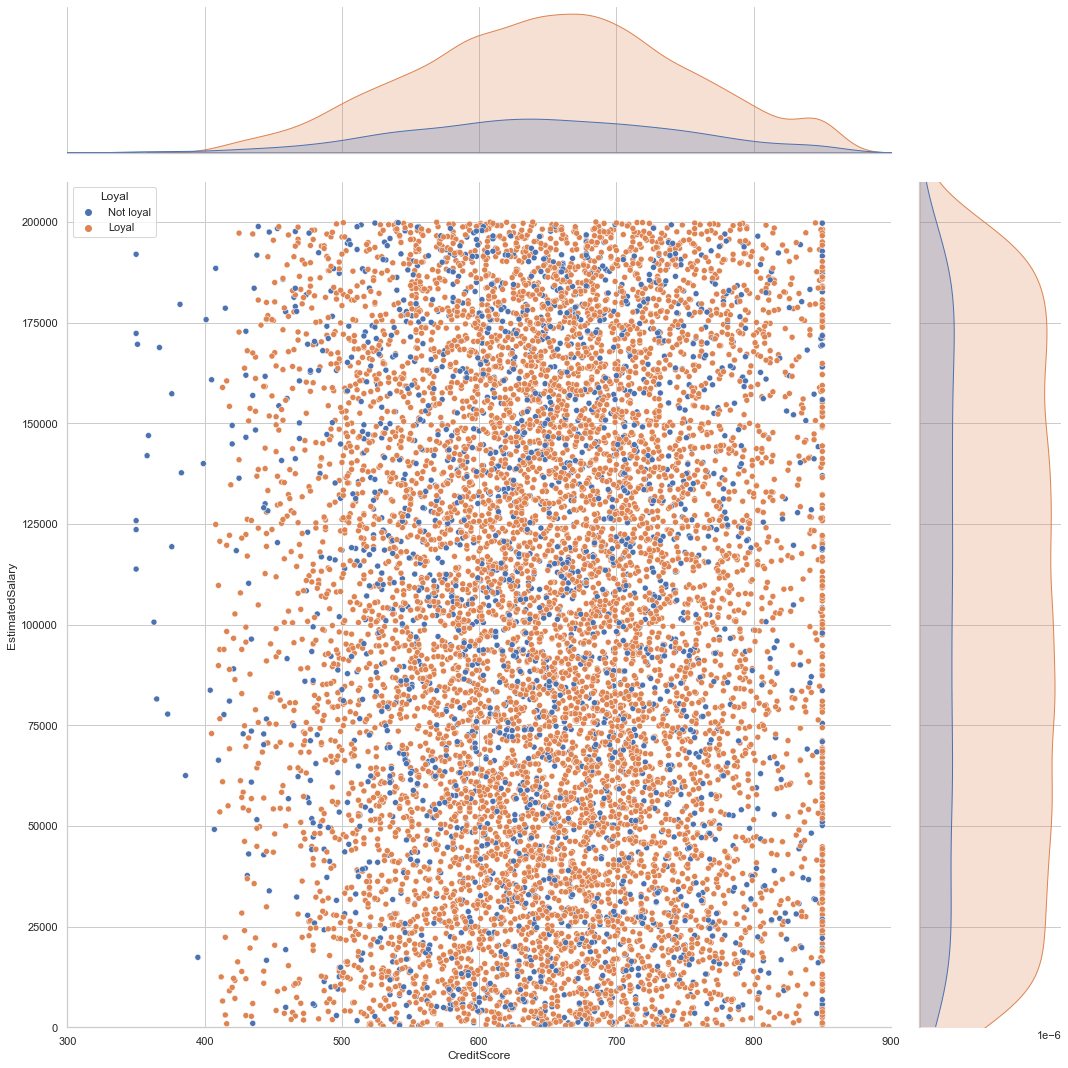

In [62]:
jointplot = sns.jointplot(
    data=churn_df, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Loyal',
    xlim = (300, 900),
    ylim = (0, 210000),
    height=15,
)

Концентрация точек в диапазоне кредитного рейтинга 550-750 наиболее высокая.На предполагаемую заработную плату повлиял признак оттока клиентов. Вообщем распределение точек по графику происходит равномерно, что говорит о том что услугами банка пользуются люди с разным уровнем дохода.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
______________________________________________________________________________________________________________________________________________________________________________________________

In [68]:
gender = churn_df.groupby(['Gender'], as_index=False).mean()
px.bar(
    data_frame=gender,
    x='Gender',
    height=400,
    y='Exited',
    width=600,
    title='Соотношение ушедших мужчин и женщин'
)

Женщины уходят чаще чем мужчины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
______________________________________________________________________________________________________________________________________________________________________________________________

In [72]:
clients_group_5 = churn_df.groupby(['NumOfProducts', 'Loyal'], as_index=False).count()
px.bar(
    data_frame=clients_group_5,
    x='NumOfProducts',
    y='RowNumber',
    color='Loyal',
    height=400,
    width=600,
    title='Количество приобретенных у банка услуг'
)

Больше всего клиентов с двумя услугами, следом идет категория клиентов с одной услугой. Наиболее нелояльные клиенты в категории приобретения от трех услуг и выше. Необходима проработка привлекательности пользования тремя и более услугами. Также выявить недостатки наличия одной услуги.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?
______________________________________________________________________________________________________________________________________________________________________________________________

In [75]:
clients_group_6 = churn_df.groupby(['Status', 'Loyal'], as_index=False).count()
px.bar(
    data_frame=clients_group_6,
    x='Status',
    y='RowNumber',
    color='Loyal',
    height=400,
    width=600,
    title='Статус активного клиента'
)

Клиенты с активным статусом более лояльны, чем с неактивным. Необходимо выявить спектр услуг, не используемых неактивными клиентами, но используемых активными и постараться донести преимущества этих услуг неактивным клиентам. Мотивировать это можно тем, что люди пользующиеся бОльшим спектром услуг имеют больше выгоды, соответственно дольше являются клиентами этого банка.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.
______________________________________________________________________________________________________________________________________________________________________________________________

In [78]:
mask2 = churn_df['Status'] == 'Inactive'
churn_df_mask2 = churn_df[mask2]

lost = churn_df_mask2.groupby(['Status', 'Geography'], as_index=False).count()
lost = lost.drop(['CreditScore', 'Gender', 'Age',
                  'Tenure', 'Balance', 'NumOfProducts',
                  'IsActiveMember', 'EstimatedSalary',
                  'Exited', 'Loyal'], axis=1)

px.choropleth(
    data_frame=lost,
    locations="Geography",
    locationmode="country names",
    color="RowNumber",
    title='Соотношение на карте мира',
    width=800,
    height=500
)

Доля ушедших клиентов больше всего во Франции.Возможно условия работы банка в этой стране не подходящие.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.
______________________________________________________________________________________________________________________________________________________________________________________________

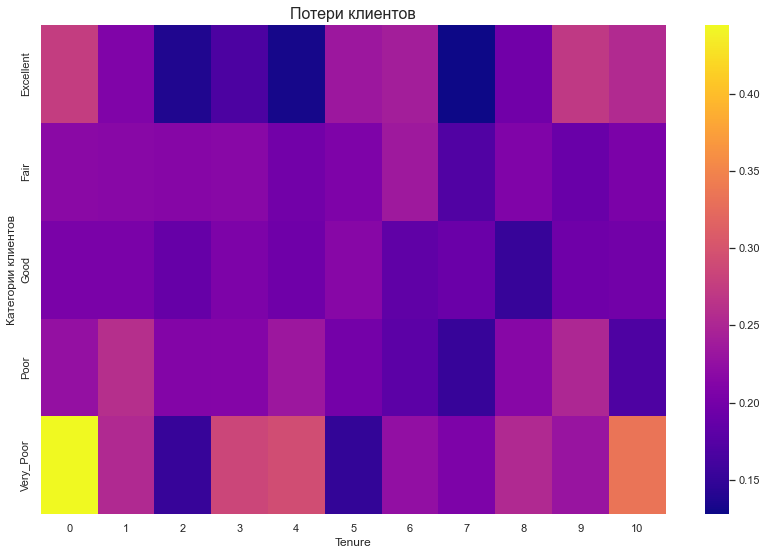

In [82]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
   
credit_score = churn_df['CreditScore'].apply(get_credit_score_cat)
churn_df['CreditScoreCat'] = credit_score
credit_cat = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
plt.figure(figsize=(14, 9))
heatmap = sns.heatmap(data=credit_cat, cmap='plasma')
heatmap.set_ylabel('Категории клиентов')
heatmap.set_title('Потери клиентов', fontsize=16)
plt.show()

Чаще всего уходят клиенты с низким кредитным рейтингом. Чем выше категория клиентов, тем меньше потерь. В категории "Превосходно" можно заметить потери после четырех лет обслуживания, что наталкивает на необходимость на работу с клиентами с долгим сроком обслуживания.